# MNIST Data set

In [27]:
import tensorflow
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

path_to_data = '/home/fraga/Documents/Kaggle Competitions/Digit Recognizer/Data/digit-recognizer/'

ModuleNotFoundError: No module named 'keras'

## Reading data and taking a look at it

In [2]:
train = pd.read_csv(path_to_data + 'train.csv')
test_x = pd.read_csv(path_to_data + 'test.csv')

In [3]:
print('Examples in train set {}'.format(train.shape[0]))
print('Examples in test set {}'.format(test_x.shape[0]))

Examples in train set 42000
Examples in test set 28000


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
test_x.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


From here we can see that the pixel values range from 0 to 255, so we'll have to transform the data in order to make it range from 0 to 1 or -1 to 1.

## Visualizing some digits

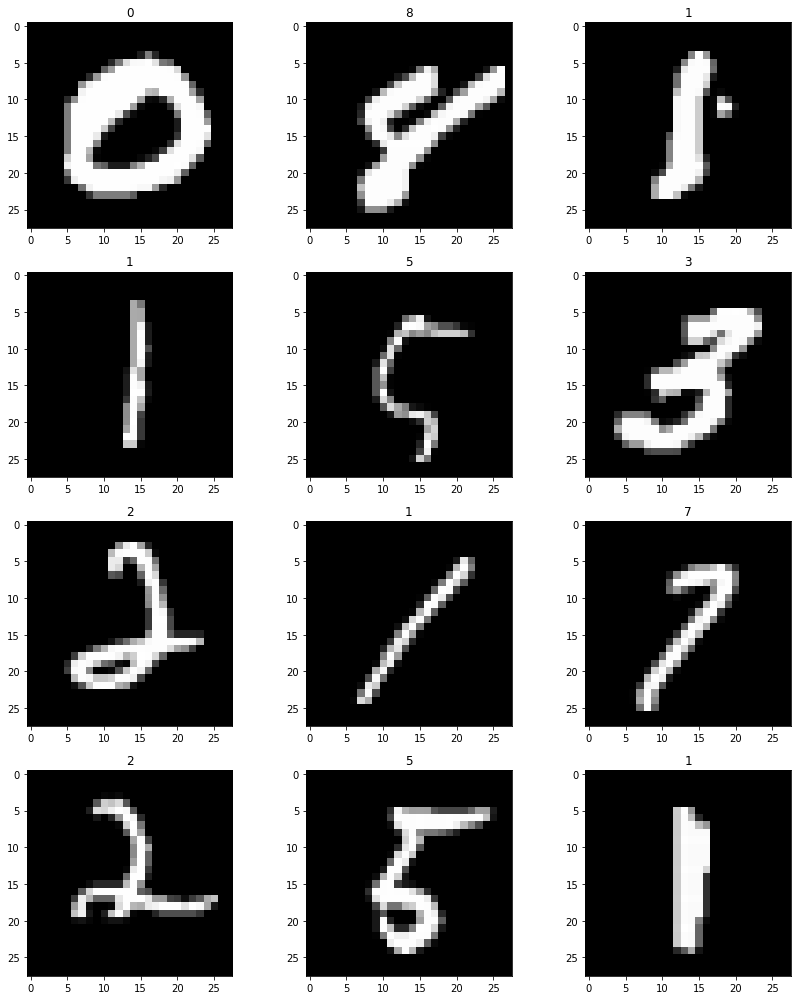

In [7]:
rows = 4
columns = 3

fig, ax = plt.subplots(rows, columns, figsize = (12, 14))

for i in range(rows):
    for j in range(columns):
        index = np.random.randint(train.shape[0])

        image = np.asarray(train.iloc[index][1:]).reshape((28, 28))
        label = train.iloc[index][0]

        ax[i][j].imshow(image, cmap = 'gray')
        ax[i][j].set_title(str(label))

plt.tight_layout()
plt.show()

## Preprocessing data

In [8]:
train_x = train.copy()

train_y = train_x['label']
del train_x['label']

In [9]:
for i in range(train_x.shape[0]):
    train_x.iloc[i] = train_x.iloc[i] / 255.0

In [10]:
for i in range(test_x.shape[0]):
    test_x.iloc[i] = test_x.iloc[i] / 255.0

In [11]:
train_x.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000860,0.000459,0.000231,0.000079,0.000068,0.000011,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024756,0.018172,0.012841,0.006901,0.007429,0.001625,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


In [12]:
test_x.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000646,0.000287,0.000110,0.000044,0.000026,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.021464,0.014184,0.007112,0.004726,0.003167,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992157,0.996078,0.756863,0.733333,0.466667,0.0,0.0,0.0,0.0,0.0


In [13]:
train_x = train_x.values.reshape(-1, 28, 28, 1)
test_x = test_x.values.reshape(-1, 28, 28, 1)
train_y = tf.one_hot(train_y, depth = 10)

## Checking shapes

In [30]:
print("Train x shape {}".format(train_x.shape))
print("Train y shape {}".format(train_y.shape))

Train x shape (42000, 28, 28, 1)
Train y shape (42000, 10)


Now that we have checked our data and preprocessed it, we can move on to creating models to test them and choose the best one.  

## Creating DL model  
As we're working with images it is common to use a convolutional neural network, which is what we're going to do.

In [37]:
model = Sequential([
    Conv2D(64, (4, 4), input_shape = (28, 28, 1)),
    MaxPooling2D((4, 4)),
    Conv2D(90, (3, 3), padding = 'same'),
    MaxPooling2D(5, 5),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [38]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc', 'mse']
)

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 25, 25, 64)        1088      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 90)          51930     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 90)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 90)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                5824      
_________________________________________________________________
dense_15 (Dense)             (None, 32)               

In [40]:
history = model.fit(train_x[..., np.newaxis], train_y, epochs = 15, batch_size = 32,
                    validation_split = 0.2)

Epoch 1/15
1050/1050 [==============================] - 22s 21ms/step - loss: 0.5107 - acc: 0.8407 - mse: 0.0221 - val_loss: 0.1491 - val_acc: 0.9583 - val_mse: 0.0063
Epoch 2/15
1050/1050 [==============================] - 21s 20ms/step - loss: 0.1318 - acc: 0.9620 - mse: 0.0058 - val_loss: 0.1030 - val_acc: 0.9711 - val_mse: 0.0045
Epoch 3/15
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0877 - acc: 0.9744 - mse: 0.0040 - val_loss: 0.0693 - val_acc: 0.9804 - val_mse: 0.0031
Epoch 4/15
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0673 - acc: 0.9796 - mse: 0.0031 - val_loss: 0.0788 - val_acc: 0.9764 - val_mse: 0.0036
Epoch 5/15
1050/1050 [==============================] - 20s 19ms/step - loss: 0.0526 - acc: 0.9840 - mse: 0.0025 - val_loss: 0.0597 - val_acc: 0.9817 - val_mse: 0.0027
Epoch 6/15
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0482 - acc: 0.9853 - mse: 0.0023 - val_loss: 0.0537 - val_acc: 0.9843 - val_mse:

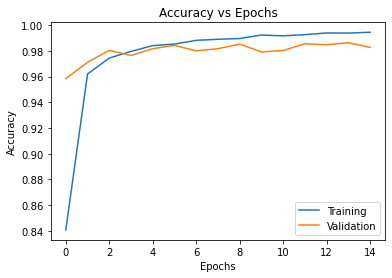

In [42]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'])
plt.show()

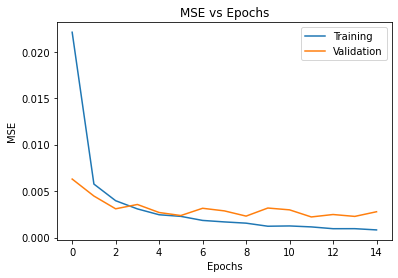

In [43]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('MSE vs Epochs')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'])
plt.show()

In [75]:
predictions = model.predict(test_x).argmax(1)

In [82]:
index = []

for i in range(1, test_x.shape[0] + 1):
    index.append(i)

In [83]:
submission = pd.DataFrame()

submission['ImageId'] = index
submission['Label'] = predictions

submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [85]:
submission.to_csv('/home/fraga/Documents/Kaggle Competitions/Digit Recognizer/Data/submission.csv', index = False)